In [219]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [220]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

from typing import List, Dict, Any, Callable
from pathlib import Path
import seaborn as sns


# local imports
from src.data_processing.preprocessing.pandas_preprocessors import flatten_dataframe
from src.data_processing.model_analyzers.elastic_net_analyzers.elastic_net_analyzer import MetricAnalyzer, FeatureImportanceAnalyzer, ExperimentMetadata
from src.data_processing.model_analyzers.elastic_net_analyzers.path_finder import PathFinder

In [221]:
results_path = Path('/Users/mds8301/Development/ENIGMA/results/experiments/endpoint_experiments/xgb_reg_da_w_action_no_day_norm_tune')
path_finder = PathFinder(results_path)
data_path = '/Users/mds8301/iterm_data_storage/raw_data_raw_data.parquet.gzip'
metric_analyzer = MetricAnalyzer(path_finder.metrics_paths[0], ExperimentMetadata)
true_vales = pd.read_parquet(path_finder.predictions_path[0])

In [222]:
metric_analyzer.data_frame

reading and cleaning data


,dataset,data_cat,with_day,is_net,metric,value
0,Train,metrics,False,None,Mean Squared Error,0.070226
1,Dev,metrics,False,None,Mean Squared Error,0.052608
2,Test,metrics,False,None,Mean Squared Error,0.057945
3,Train,metrics,False,None,Mean Squared Error,0.067604
4,Dev,metrics,False,None,Mean Squared Error,0.021980
...,...,...,...,...,...,...
265,Dev,metrics,False,None,R2 Score,-0.208673
266,Test,metrics,False,None,R2 Score,-0.100095
267,Train,metrics,False,None,R2 Score,0.151474
268,Dev,metrics,False,None,R2 Score,-5.940901


<Axes: xlabel='true_values', ylabel='predictions'>

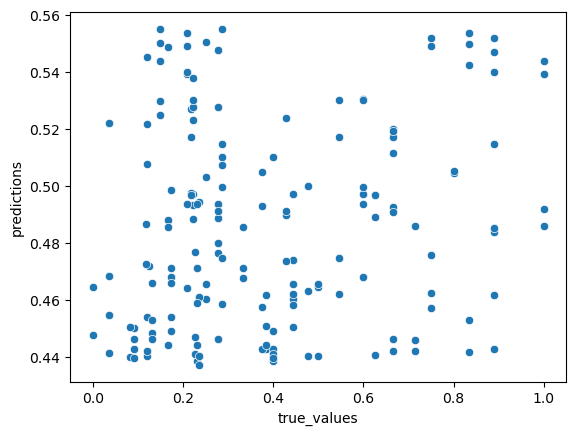

In [98]:
sns.scatterplot(data = true_vales, x = 'true_values', y = 'predictions')


/Users/mds8301/Development/ENIGMA/src/data_processing/model_analyzers/elastic_net_analyzers/elastic_net_analyzer.py:231: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance',


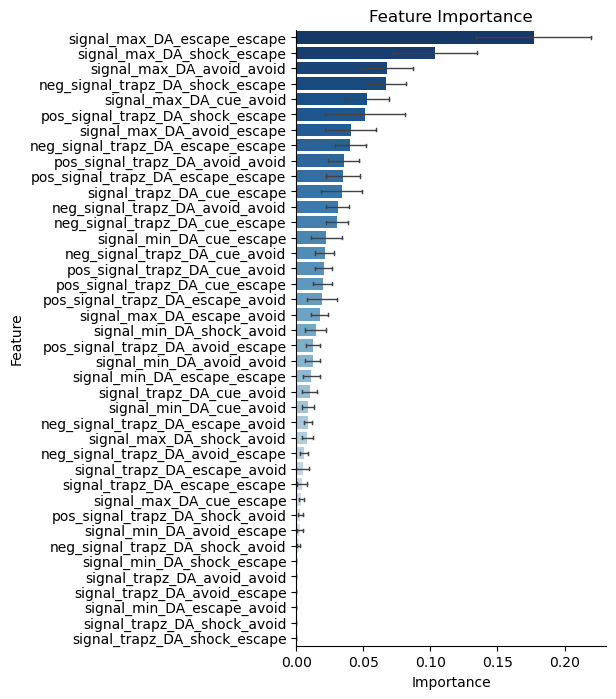

In [226]:
feature_analyzer = FeatureImportanceAnalyzer(path_finder.feature_importance_paths[0], ExperimentMetadata)
feature_analyzer.read_and_clean_data()

feature_analyzer.plot_data()

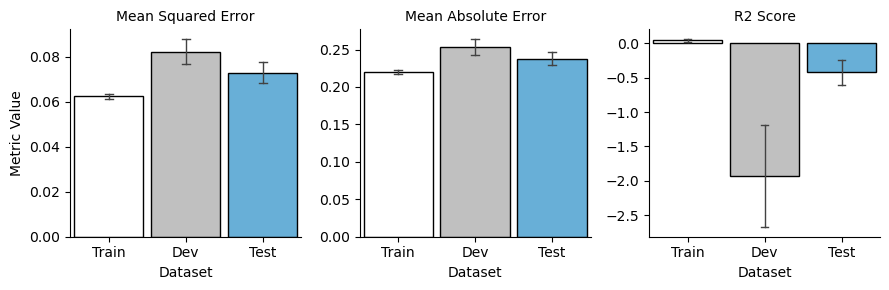

In [5]:
metric_analyzer.read_and_clean_data()
metric_analyzer.plot_data()
        


In [223]:
from src.data_processing.pipelines.ClassifierPipe import ClassifierPipe
from functools import partial
from src.data_processing.preprocessing.pandas_preprocessors import *

predictions = pd.read_parquet(path_finder.predictions_path[0])

path_to_save = Path('/Users/mds8301/iterm_data_storage/')
query = "sensor=='DA'"
partial_normalized_preprocessor = partial(normalized_preprocessor_wo_day, normalizer=normalize_by_baseline, query=query, experiment_cols_to_drop=None) 




pro = (ClassifierPipe(data_path) .read_raw_data()
                      .pandas_pipe(partial_normalized_preprocessor)
                      .split_by_ratio(target='ratio_avoid', test_size=0.5, test_dev_size=0.3)
                      .transform_data()
                      )
pro.processed_data
# a comment

,ratio_avoid,day,neg_signal_trapz_DA_avoid_avoid,neg_signal_trapz_DA_avoid_escape,neg_signal_trapz_DA_cue_avoid,neg_signal_trapz_DA_cue_escape,neg_signal_trapz_DA_escape_avoid,neg_signal_trapz_DA_escape_escape,neg_signal_trapz_DA_shock_avoid,neg_signal_trapz_DA_shock_escape,...,signal_min_DA_shock_avoid,signal_min_DA_shock_escape,signal_trapz_DA_avoid_avoid,signal_trapz_DA_avoid_escape,signal_trapz_DA_cue_avoid,signal_trapz_DA_cue_escape,signal_trapz_DA_escape_avoid,signal_trapz_DA_escape_escape,signal_trapz_DA_shock_avoid,signal_trapz_DA_shock_escape
0,0.000000,1,0.000000,-668.796509,-3817.579346,-1489.481079,0.000000,-988.687195,0.000000,-977.627686,...,0.000000,-3.002911,0.000000,2907.998535,-3183.965088,302.228912,0.000000,1303.563599,0.000000,1436.711182
1,0.000000,2,-1193.281738,-738.755127,-1669.019653,-1926.954346,0.000000,-244.021622,0.000000,-168.938858,...,0.000000,-2.190821,1256.177612,3232.561523,384.126221,256.757141,0.000000,6181.833496,0.000000,6453.421875
2,0.000000,5,-1308.117798,-892.263855,-1973.290527,-1093.665161,0.000000,-483.682129,0.000000,-497.394043,...,0.000000,-2.858871,1111.174927,2360.019531,-200.806641,1757.797852,0.000000,4190.400879,0.000000,4226.086426
3,0.000000,6,-1773.341919,-819.062195,-1783.758179,-1885.899048,0.000000,-348.609619,0.000000,-343.013611,...,0.000000,-2.273660,-128.383606,1716.671509,-320.167542,2.489299,0.000000,3878.971436,0.000000,3890.025391
4,0.000000,7,-1291.262939,-1290.083008,-1634.867676,-1559.951782,0.000000,-610.024475,0.000000,-791.375610,...,0.000000,-2.962373,591.463135,1352.424927,-64.760262,530.274597,0.000000,3674.203613,0.000000,3242.768311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.888889,7,-283.199249,-656.547058,-1982.218262,-1441.721191,-213.712128,-518.561340,-433.241852,-175.173416,...,-2.386463,-2.203851,3051.948242,1886.966431,-486.527069,-88.138916,4031.303467,2414.378174,3407.689941,3700.892334
65,1.000000,4,-1284.647583,-357.852600,-2174.363037,-393.997864,-222.826599,0.000000,-420.915619,0.000000,...,-2.670985,0.000000,1177.332886,3034.960693,-454.973022,2919.973145,3265.118408,0.000000,2786.567139,0.000000
66,1.000000,5,-1180.902832,-1483.796509,-1819.947632,-1908.016479,-392.994965,0.000000,-618.594116,0.000000,...,-3.183576,0.000000,934.879822,-78.928833,-383.901245,-573.643616,2748.654053,0.000000,2369.767090,0.000000
67,1.000000,6,-1312.205078,-515.032959,-2009.640869,-1573.549561,-458.567963,0.000000,-723.538025,0.000000,...,-3.580814,0.000000,1059.609619,2826.082031,-318.826385,411.558807,3130.062012,0.000000,2802.887695,0.000000


In [55]:
path_to_save = Path('/Users/mds8301/iterm_data_storage/')
test_data = pro.processed_data
test_data.to_parquet(path_to_save / 'test_data.parquet.gzip', compression='gzip')

In [56]:
test_data_path = path_to_save / 'test_data.parquet.gzip'
pro = (ClassifierPipe(test_data_path)
                      .read_raw_data()
                      .split_by_ratio(target='ratio_avoid', test_size=0.5, test_dev_size=0.3)
                      .transform_data()
                      )

In [225]:
pd.DataFrame(pro.X_train)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.476701,0.136087,-1.023093,-0.627442,1.371706,0.470001,0.770792,-0.039578,0.829838,0.982864,...,-0.362737,0.589698,1.076197,-0.798034,-0.392207,1.226694,0.266508,0.500685,0.015692,0.460292
1,0.993933,0.005386,-1.020073,-0.921204,-0.099330,0.360460,0.438342,0.039402,0.268890,0.796779,...,-0.625638,0.153905,0.821529,-0.445443,-0.280709,0.555943,0.714863,0.566412,0.577205,0.479820
2,-0.937137,-0.242120,-2.559109,-0.291057,-0.744460,1.177678,1.206628,1.386269,1.277305,0.344157,...,1.587580,1.734902,0.236210,-1.826447,-0.182805,0.663533,0.939180,2.063942,1.090595,1.962432
3,0.028398,0.043721,-0.388820,-0.047762,0.182709,0.736435,0.080154,0.559731,0.196415,0.364716,...,0.298611,-0.044866,0.395884,-0.380898,-0.251537,-0.106816,0.446952,-0.212722,0.295258,-0.134486
4,0.511166,0.170219,-0.740152,-0.499537,0.533130,-0.917846,0.146206,-1.132889,-0.094574,0.628507,...,-0.850864,-0.616437,0.728409,-0.770010,-0.255058,0.284136,-0.622446,0.366878,-0.733424,0.274353
5,-0.454369,-0.336411,0.883810,0.519133,-0.732088,0.923223,-0.397200,0.962870,-0.610205,0.448313,...,0.627299,-0.684831,0.297599,1.454523,0.651727,-0.022205,1.583867,0.377227,1.462882,0.258886
6,-0.454369,-0.401145,0.972230,-0.187752,1.339646,0.370691,0.123832,-0.029016,0.262759,0.397960,...,0.343153,0.288995,0.214453,0.946403,0.023837,1.821913,-0.380450,0.059327,-0.554965,0.142926
7,-0.937137,0.283898,-0.040868,-2.479213,0.597208,-0.030351,0.322380,0.079171,0.620064,0.751814,...,0.113393,0.267535,0.910283,0.306754,-0.955478,1.320277,0.378144,1.035894,0.462043,1.241721
8,-1.419905,0.197114,-0.482540,0.785183,0.509005,-1.923593,-2.014061,-2.339515,-1.717199,0.664302,...,-1.187162,-1.586578,0.778247,-0.750762,0.192352,0.282715,-1.231744,-1.276875,-1.456234,-1.136356
9,-1.419905,-2.119303,0.901024,-2.119780,-0.313790,0.458896,0.155558,0.209421,0.016608,-0.378228,...,0.623790,0.343762,-1.416311,0.731418,-1.732615,-0.970655,-0.029716,-0.056459,-0.091834,-0.073526


In [ ]:
data = pro.processed_data
saved_ids = data[['ratio_avoid', 'day']]
# saved_ids
test_data = pd.read_parquet(path_to_save / 'test_data.parquet.gzip')


In [128]:
print(test_data.shape)
print(true_vales.shape)

(69, 42)
(180, 42)


In [205]:
def format_true_vals(df):
    return (
        df
        # .rename(columns = {'true_values': 'ratio_avoid'})
        .reset_index(drop = True)
    )

true_vales_f = format_true_vals(true_vales)


KeyError: 'ratio_avoid'

,ratio_avoid,day,neg_signal_trapz_DA_avoid_avoid,neg_signal_trapz_DA_avoid_escape,neg_signal_trapz_DA_cue_avoid,neg_signal_trapz_DA_cue_escape,neg_signal_trapz_DA_escape_avoid,neg_signal_trapz_DA_escape_escape,neg_signal_trapz_DA_shock_avoid,neg_signal_trapz_DA_shock_escape,...,signal_min_DA_shock_avoid,signal_min_DA_shock_escape,signal_trapz_DA_avoid_avoid,signal_trapz_DA_avoid_escape,signal_trapz_DA_cue_avoid,signal_trapz_DA_cue_escape,signal_trapz_DA_escape_avoid,signal_trapz_DA_escape_escape,signal_trapz_DA_shock_avoid,signal_trapz_DA_shock_escape
0,0.000000,1,0.000000,-668.796509,-3817.579346,-1489.481079,0.000000,-988.687195,0.000000,-977.627686,...,0.000000,-3.002911,0.000000,2907.998535,-3183.965088,302.228912,0.000000,1303.563599,0.000000,1436.711182
1,0.000000,2,-1193.281738,-738.755127,-1669.019653,-1926.954346,0.000000,-244.021622,0.000000,-168.938858,...,0.000000,-2.190821,1256.177612,3232.561523,384.126221,256.757141,0.000000,6181.833496,0.000000,6453.421875
2,0.000000,5,-1308.117798,-892.263855,-1973.290527,-1093.665161,0.000000,-483.682129,0.000000,-497.394043,...,0.000000,-2.858871,1111.174927,2360.019531,-200.806641,1757.797852,0.000000,4190.400879,0.000000,4226.086426
3,0.000000,6,-1773.341919,-819.062195,-1783.758179,-1885.899048,0.000000,-348.609619,0.000000,-343.013611,...,0.000000,-2.273660,-128.383606,1716.671509,-320.167542,2.489299,0.000000,3878.971436,0.000000,3890.025391
4,0.000000,7,-1291.262939,-1290.083008,-1634.867676,-1559.951782,0.000000,-610.024475,0.000000,-791.375610,...,0.000000,-2.962373,591.463135,1352.424927,-64.760262,530.274597,0.000000,3674.203613,0.000000,3242.768311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.888889,7,-283.199249,-656.547058,-1982.218262,-1441.721191,-213.712128,-518.561340,-433.241852,-175.173416,...,-2.386463,-2.203851,3051.948242,1886.966431,-486.527069,-88.138916,4031.303467,2414.378174,3407.689941,3700.892334
65,1.000000,4,-1284.647583,-357.852600,-2174.363037,-393.997864,-222.826599,0.000000,-420.915619,0.000000,...,-2.670985,0.000000,1177.332886,3034.960693,-454.973022,2919.973145,3265.118408,0.000000,2786.567139,0.000000
66,1.000000,5,-1180.902832,-1483.796509,-1819.947632,-1908.016479,-392.994965,0.000000,-618.594116,0.000000,...,-3.183576,0.000000,934.879822,-78.928833,-383.901245,-573.643616,2748.654053,0.000000,2369.767090,0.000000
67,1.000000,6,-1312.205078,-515.032959,-2009.640869,-1573.549561,-458.567963,0.000000,-723.538025,0.000000,...,-3.580814,0.000000,1059.609619,2826.082031,-318.826385,411.558807,3130.062012,0.000000,2802.887695,0.000000


['X_dev',
 'X_test',
 'X_train',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'bin_trial_count',
 'calculate_max_min_signal',
 'calculate_percent_avoid',
 'drop_features',
 'pandas_pipe',
 'path_to_data',
 'processed_data',
 'processor',
 'query_by_col',
 'read_raw_data',
 'split_by_ratio',
 'stratify_and_split_by_mouse',
 'transform_data',
 'y_dev',
 'y_test',
 'y_train']